
## Import libraries

In [ ]:
!pip3 install rdkit

In [ ]:
# Array and DataFrame construction/manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Linear regression models
from sklearn.linear_model import LinearRegression

# Molecular representation and feature extraction
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw


## Import Dataset

In [ ]:

url = "https://raw.githubusercontent.com/GLambard/Molecules_Dataset_Collection/master/latest/ESOL_delaney-processed.csv"
df = pd.read_csv(url, index_col=0)
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)C...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,CC1:O:C:C:C:1C(=O)NC1:C:C:C:C:C:1
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC=O
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,C1:C:C:C2:C(:C:1):C:C:C1:C:2:C:C:C2:C3:C:C:C:C...
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,C1:C:C:S:C:1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [ ]:
# Create target, features, and data DataFrames for visualizations
target = df['measured log solubility in mols per litre']
features = df[['Minimum Degree',	'Molecular Weight',	'Number of H-Bond Donors',	'Number of Rings',	'Number of Rotatable Bonds',	'Polar Surface Area']]
data = pd.concat([features, target], axis=1)

data.head()

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
0,1,457.432,7,3,7,202.32,-0.77
1,1,201.225,1,2,2,42.24,-3.30
2,1,152.237,0,0,4,17.07,-2.06
3,2,278.354,0,5,0,0.00,-7.87
4,2,84.143,0,1,0,0.00,-1.33


## Create molecule objects

             Compound Name: Fenfuram              
    SMILES: CC1:O:C:C:C:1C(=O)NC1:C:C:C:C:C:1     
--------------------------------------------------


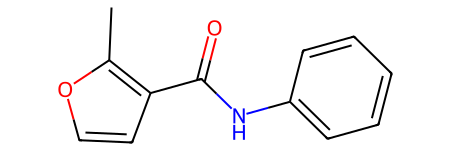

cLogP:	2.8403
MW:	201.2250
NB:	2
AP:	0.7333333333333333


In [ ]:
# Create an array of molecule objects from SMILES strings in the DataFrame
molecules = df.smiles.map(Chem.MolFromSmiles).to_numpy()

# Take a sample molecule to demonstrate preprocessing
sample_molecule = molecules[1]

# Get predictors cLogP, RB, and for a sample molecule
sample_name =  "Fenfuram" #df.CompoundID[1]
sample_smiles = df.smiles[1]
sample_cLogP = Descriptors.MolLogP(sample_molecule)
sample_MW = Descriptors.MolWt(sample_molecule)
sample_RB = Descriptors.NumRotatableBonds(sample_molecule)

# Calculate the Aromatic Proportion (#aromatic atoms / #heavy atoms)
n_atoms = sample_molecule.GetNumAtoms()
n_aromatics = sum([sample_molecule.GetAtomWithIdx(i).GetIsAromatic() for i in range(n_atoms)])
n_heavy = Descriptors.HeavyAtomCount(sample_molecule)

sample_AP = n_aromatics / n_heavy
print('='*50)
print(f"Compound Name: {sample_name}".center(50))
print(f"SMILES: {sample_smiles}".center(50))
print('-'*50)

display(sample_molecule)
print(f"cLogP:\t{sample_cLogP:.4f}")
print(f"MW:\t{sample_MW:.4f}")
print(f"NB:\t{sample_RB}")
print(f"AP:\t{sample_AP}")
print('='*50)

# Data Understanding

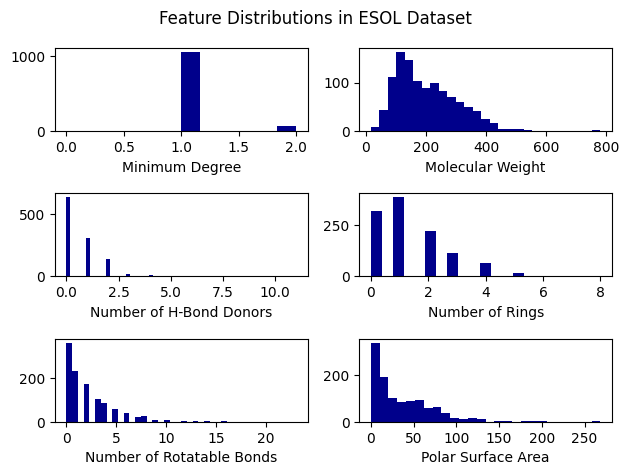

In [ ]:

fig, axes = plt.subplots(3, 2)
fig.suptitle('Feature Distributions in ESOL Dataset')
for ax, col in zip(axes.flatten(), features.columns):
    ax.hist(x=features[col], bins='auto', color='darkblue')
    ax.set_xlabel(col)

fig.tight_layout()
plt.savefig('/content/drive/MyDrive/images/plots/feature_distributions.png')
plt.show()

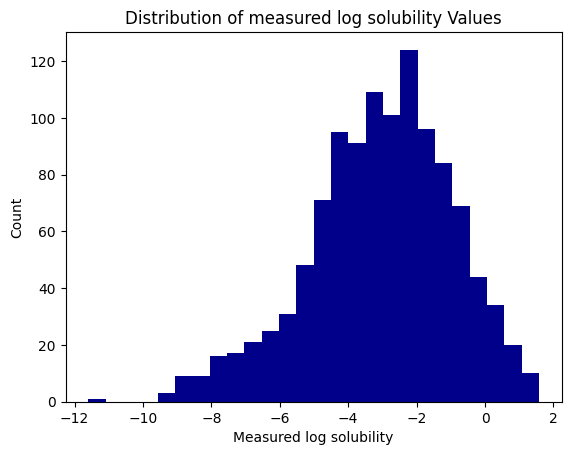

In [ ]:
fig, ax = plt.subplots()
ax.hist(x=target, bins='auto', color='darkblue')
ax.set(title='Distribution of measured log solubility Values', xlabel='Measured log solubility', ylabel='Count')

plt.savefig('/content/drive/MyDrive/images/plots/LogS_distribution.png')
plt.show()

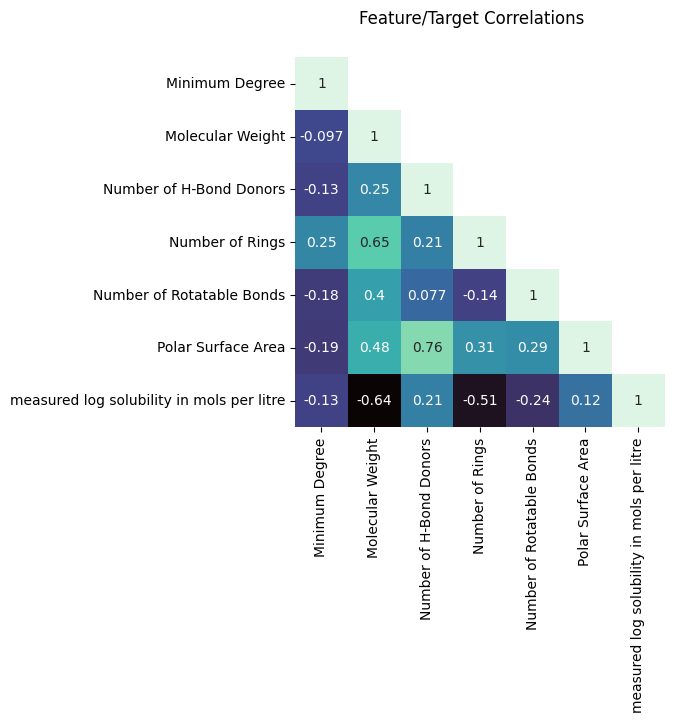

In [ ]:
correlations = data.corr()
plt.figure()
plt.suptitle('Feature/Target Correlations')
sns.heatmap(
    correlations,
    annot=True,
    cmap='mako',
    cbar=False,
    square=True,
    mask=np.triu(np.ones_like(correlations), 1)
)
plt.savefig('/content/drive/MyDrive/images/plots/corr_heatmap.png')
plt.show()

## Linear Regression

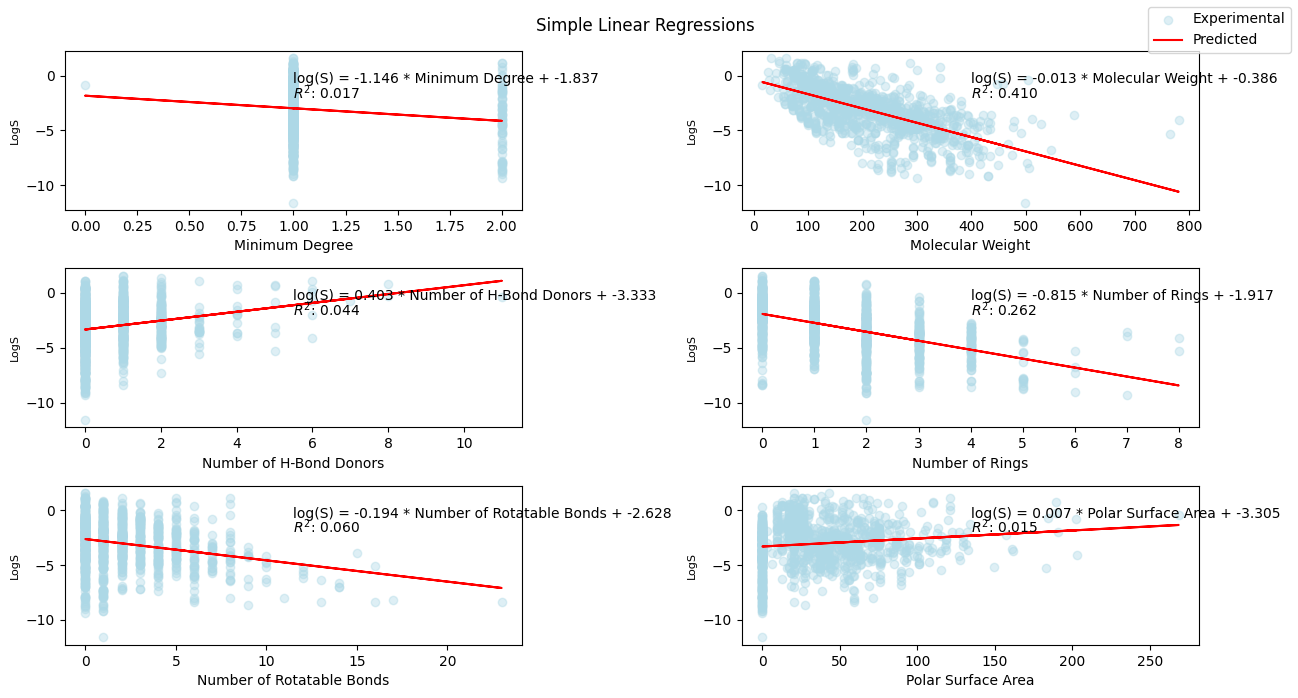

In [ ]:
X = features.to_numpy()
y_true = target.to_numpy()

fig, axes = plt.subplots(3, 2, figsize=(13, 7))
fig.suptitle('Simple Linear Regressions')
for ax, col in zip(axes.flatten(), features.columns):
    x = features[col].to_numpy().reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y_true)

    y_pred = model.predict(x)
    score = model.score(x, y_true)

    coefficient = model.coef_[0]
    intercept = model.intercept_
    formula = f"log(S) = {coefficient:.3f} * {col} + {intercept:.3f}"

    ax.set_xlabel(col)
    ax.set_ylabel('LogS', size=8)

    true = ax.scatter(x, y_true, color='lightblue', marker='o', alpha=0.4, label='Experimental')
    pred, = ax.plot(x, y_pred, 'r', label='Predicted')

    ax.annotate(formula, (.5, .8), xycoords='axes fraction', size=10)
    ax.annotate(f"$R^2$: {score:.3f}", (.5, .7), xycoords='axes fraction', size=10)

fig.legend(handles=[true, pred], loc='upper right')
fig.tight_layout()
plt.savefig('/content/drive/MyDrive/images/plots/simple_lrs.png')
plt.show()

## Multiple Linear Regression

0.6856666003196059


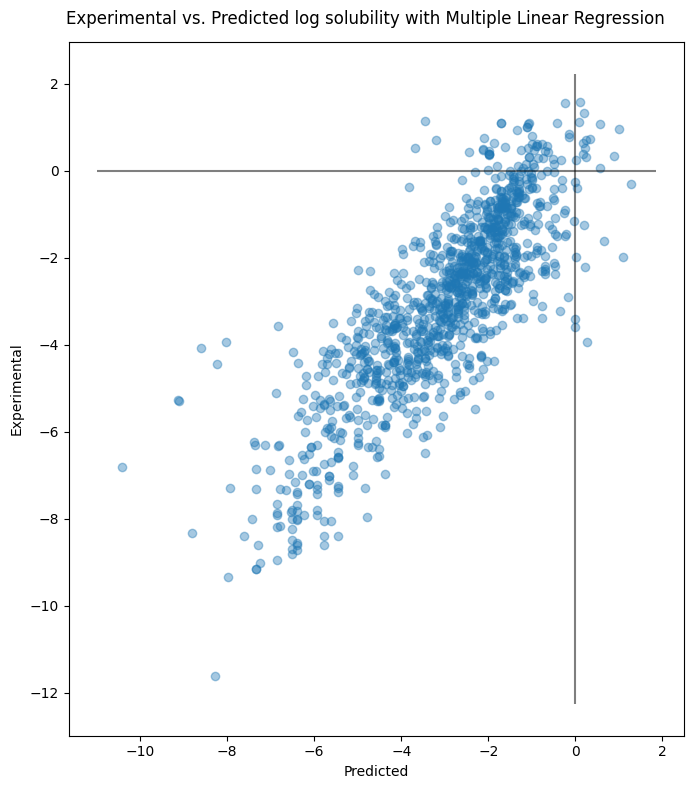

LogS = -0.499*Minimum Degree + -0.014*Molecular Weight + 0.073*Number of H-Bond Donors + -0.413*Number of Rings + -0.143*Number of Rotatable Bonds + 0.032*Polar Surface Area + -0.01
R^2: 0.686


In [ ]:
lrs = LinearRegression()
lrs.fit(X, y_true)

r2_score = lrs.score(X, y_true)
print(r2_score)
y_pred = lrs.predict(X)

feature_names = features.columns
coefficients = lrs.coef_
intercept = lrs.intercept_

terms = [f"{coef:.3f}*{name}" for coef, name in zip(coefficients, feature_names)] + [f"{intercept:.2f}"]
formula = 'LogS = '+ ' + '.join(terms)
annotation = formula + '\n' + f"R^2: {r2_score:.3f}"


fig, ax = plt.subplots(figsize=(8, 8))


fig.suptitle('Experimental vs. Predicted log solubility with Multiple Linear Regression')

ax.set_ylabel('Experimental')
ax.set_xlabel('Predicted')

ax.scatter(y_pred, y_true, marker='o', alpha=0.4)
ax.set_aspect('equal')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.hlines(0, xmin, xmax, color='black', alpha=0.5)
ax.vlines(0, ymin, ymax, color='black', alpha=0.5)

#ax.annotate(annotation, (.07, .9), xycoords='axes fraction', size=9)

fig.tight_layout()
plt.savefig('/content/drive/MyDrive/images/plots/multiple_lr.png')
plt.show()

print(annotation)